In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Introdução ao problema | Introduction to the problem


## (PT-BR)

Conforme apresentado no curso "Probability and Statistics in Data Science using Python" disponível [clicando aqui](https://learning.edx.org/course/course-v1:UCSanDiegoX+DSE210x+2T2023/home), esse notebook tem o objetivo de replicar um exemplo apresentado durante o curso.

É ilustrado o seguinte cenário: 3 Cartas são colocadas dentro uma caixa, as cartas possuem as seguintes caraterísticas:
 
- Primeira carta tem um lado azul e outro vermelho
- Segunda carta possui dois lados azuis
- Terceira carta possui dois lados vermelhos

Supondo que uma carta seja aleatoriamente retirada da caixa, qual a probabilidade do outro lado ter a mesma cor?

Para esse propósito, será desenvolvido aqui uma simulação de monte carlo para encontrar uma aproximação desses valores


## (EN-US)

As presented in the course "Probability and Statistics in Data Science using Python" available [here](https://learning.edx.org/course/course-v1:UCSanDiegoX+DSE210x+2T2023/home), this Jupyter Notebook aims to replicate the example shown during the course

The following scenario is illustrated: 3 cards are placed inside a box. These cards have the following characteristics:

- The first card has one blue side and another red side,
- The second card has both sides blue,
- The third card has both sides red.

Supposing that one card is randomly chosen from the box, what is the probability that both sides have the same color?

For the proposal, a Monte Carlo simulation will be developed to find the approximate values.

# Codando a solução | Coding the solution

In [8]:
# Defining the possible events:
events = np.array(['RR', 'BB', 'RB', 'BR'])

# Where n = number of simulations 
def simulate(n):
    # Creating variables referring to events where the cards are equal or different
    equal_card = 0
    different_card = 0

    # Simulation. The number of simulations is equal to 100, but it can be modified
    for i in range(n):
        
        # Defining choosing a random event.
        chosen_event = np.random.choice(events)
        
        # Calculation the sum of occurrences for a specific event
        if chosen_event in ['RR', 'BB']:
            equal_card+=1
        elif chosen_event in ['RB', 'BR']:
            different_card+=1

    # Consolidating the results 
    return {'equal_card':equal_card, 'different_card':different_card}

print(simulate(100))

{'equal_card': 50, 'different_card': 50}


## PT-BR

Criamos uma função para calcular a probabilidade de cada evento (cartas iguais ou diferentes).

Pense comigo... Se subtrairmos uma ocorrência da outra, vamos encontrar quantidade que um evento ocorreu a mais ou a menos que o outro. Tendo isso em mente, podemos criar uma distribuição. Em um cenário ideal, esse número deve ser 0, levando em conta que cada evento tem 50% de chance de ocorrer, se os eventos ocorrem com a mesma frequência, a diferença entre eles deve ser 0.

## EN-US

We created a function to calculate the probability of a specific event occurring (equal or different cards).

Think with me... If we subtract the occurrences of one event from another, we find the number by which one event occurred more than the other. Keeping this in mind, we can create a distribution of probabilities. In an ideal scenario, this number must be 0, considering that each event has a 50% of chance to occurring. If these events occurs with the same frequency, the difference between them must be 0. 

# [PT-BR] Criando distribuição de probabilidades
# [EN-US] Creating probability distribution 

(array([6.0000e+00, 1.8700e+02, 2.0970e+03, 1.0961e+04, 2.8093e+04,
        3.3526e+04, 1.9054e+04, 5.3590e+03, 6.6700e+02, 5.0000e+01]),
 array([-148. , -119.8,  -91.6,  -63.4,  -35.2,   -7. ,   21.2,   49.4,
          77.6,  105.8,  134. ]),
 <BarContainer object of 10 artists>)

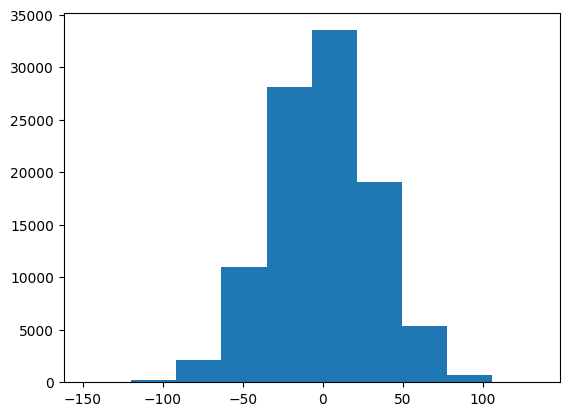

In [26]:
distribution = []

for i in range(100_000):
    list_of_values = list(simulate(1000).values())
    difference = list_of_values[0] - list_of_values[1]
    distribution.append(difference)

plt.hist(np.array(distribution))

# [PT-BR] Resultados
# [EN-US] Results

## [PT-BR]
Considerando que a média de valores é 0 e a diferença entre as probabilidades tende a 0, podemos assumir com uma grande confiança que ambos eventos possuem probabilidades iguais de ocorrer.

## [EN-US]
Considering that the mean is 0 and the difference between probabilities tends toward 0, we can assume with a great confidence that both events have an equal probability to occur.